In [1]:
#Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
#Importing the dataset
maxtemp=pd.read_csv("C:/Users/Abhishek Wagh/Desktop/MTech_Project/Sugarcane/Phase1/csv/MaxTemperature/maxtemp.csv")

In [3]:
maxtemp

,Year,Month,maxtemp_past,maxtemp_pasttopast,MaxTemperature
0,2002,1,31.85,32.36,30.91
1,2002,2,35.65,33.19,34.26
2,2002,3,36.76,37.03,37.74
3,2002,4,38.33,40.63,40.22
4,2002,5,38.33,36.28,38.46
...,...,...,...,...,...
211,2019,8,29.42,30.14,30.14
212,2019,9,31.32,30.20,30.20
213,2019,10,33.12,29.70,29.70
214,2019,11,32.22,28.97,28.97


In [4]:
maxtemp.shape

(216, 5)

In [5]:
maxtemp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 5 columns):
Year                  216 non-null int64
Month                 216 non-null int64
maxtemp_past          216 non-null float64
maxtemp_pasttopast    216 non-null float64
MaxTemperature        216 non-null float64
dtypes: float64(3), int64(2)
memory usage: 8.6 KB


In [6]:
#Creating correlation matrix for precipitation
corr_matrix=maxtemp.corr()
corr_matrix

,Year,Month,maxtemp_past,maxtemp_pasttopast,MaxTemperature
Year,1.000000,0.000000,0.004891,-0.006694,0.005800
Month,0.000000,1.000000,-0.550573,-0.557472,-0.550159
maxtemp_past,0.004891,-0.550573,1.000000,0.915769,0.916081
maxtemp_pasttopast,-0.006694,-0.557472,0.915769,1.000000,0.911580
MaxTemperature,0.005800,-0.550159,0.916081,0.911580,1.000000


In [7]:
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

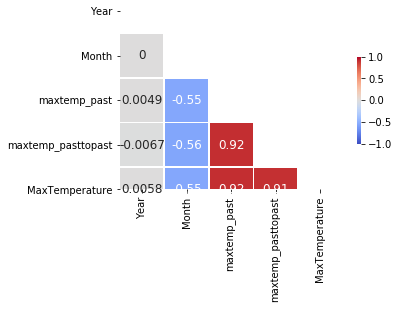

In [8]:
f, ax = plt.subplots(figsize=(5, 4)) 
heatmap = sns.heatmap(corr_matrix, mask = mask,square = True,linewidths = .5, cmap = 'coolwarm', cbar_kws = {'shrink': .4, 'ticks' : [-1, -.5, 0, 0.5, 1]},vmin = -1, vmax = 1,annot = True,annot_kws = {'size': 12})
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [9]:
maxtemp=maxtemp.drop(['Year','Month'],axis=1)

In [10]:
maxtemp.shape

(216, 3)

In [11]:
X=maxtemp.drop('MaxTemperature',axis=1)
y=maxtemp.MaxTemperature

In [12]:
X

,maxtemp_past,maxtemp_pasttopast
0,31.85,32.36
1,35.65,33.19
2,36.76,37.03
3,38.33,40.63
4,38.33,36.28
...,...,...
211,29.42,30.14
212,31.32,30.20
213,33.12,29.70
214,32.22,28.97


In [13]:
y

0      30.91
1      34.26
2      37.74
3      40.22
4      38.46
       ...  
211    30.14
212    30.20
213    29.70
214    28.97
215    28.42
Name: MaxTemperature, Length: 216, dtype: float64

In [14]:
X.shape

(216, 2)

In [15]:
y.shape

(216,)

In [16]:
#Creating Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

In [17]:
X_train,y_train=np.array(X_train),np.array(y_train)

### Linear Regressor

In [18]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge

In [19]:
li=LinearRegression()

In [20]:
li.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
#Prediction of values
Lir_ypred= li.predict(X_test)
Lir_ypred

array([30.82758689, 28.8399647 , 29.93260121, 31.76079788, 34.94883261,
       30.38483783, 36.79112314, 28.94143286, 30.54393682, 30.28042219,
       30.64621258, 29.85204201, 30.99979142, 33.76993057, 33.73362083,
       34.0386443 , 31.64902582, 39.60435226, 29.23474249, 38.72951946,
       28.53968542, 32.23230211, 30.93501896, 31.76848082, 32.22281453,
       36.46125492, 37.96625266, 32.76514073, 30.99444569, 30.00624226,
       32.81409158, 36.21960349, 29.54193991, 34.62769588, 34.68602256,
       29.9511468 , 29.19951617, 36.91174715, 31.47056492, 34.47865194,
       31.20571802, 31.64489189, 29.49206098, 39.59814741])

In [22]:
#print('Mean Absolute Error:',mean_absolute_error(y_test,Lir_ypred))
print('Mean squared Error:',mean_squared_error(y_test,Lir_ypred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,Lir_ypred)))
#print('R2_Score:',r2_score(y_test,Lir_ypred))

Mean squared Error: 1.8902623554543987
Root Mean Squared Error: 1.374868122931941


In [23]:
linear_r2_score=r2_score(y_test,Lir_ypred)
linear_r2_score

0.7796982060764118

### Lasso Regressor

In [24]:
#Lasso Regressor
lass=Lasso(alpha=0.0001)
lass.fit(X_train,y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [25]:
Lass_ypred= lass.predict(X_test)

In [26]:
print('Mean squared Error:',mean_squared_error(y_test,Lass_ypred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,Lass_ypred)))
#print('R2_Score:',r2_score(y_test,Lass_ypred))

Mean squared Error: 1.8902789963822946
Root Mean Squared Error: 1.3748741747455635


In [27]:
lasso_r2_score=r2_score(y_test,Lass_ypred)
lasso_r2_score

0.7796962666491903

### Ridge Regressor

In [28]:
#RIdge
rid=Ridge(alpha=0.0001)
rid.fit(X_train,y_train)

Ridge(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [29]:
rid_ypred= rid.predict(X_test)

In [30]:
print('Mean squared Error:',mean_squared_error(y_test,rid_ypred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,rid_ypred)))
#print('R2_Score:',r2_score(y_test,rid_ypred))

Mean squared Error: 1.8902623141040442
Root Mean Squared Error: 1.374868107894006


In [31]:
ridge_r2_score=r2_score(y_test,rid_ypred)
ridge_r2_score

0.7796982108956145

### Decision Tree Regressor

In [32]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()

In [33]:
dt.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [34]:
dt_ypred= dt.predict(X_test)

In [35]:
print('Mean squared Error:',mean_squared_error(y_test,dt_ypred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,dt_ypred)))
#print('R2_Score:',r2_score(y_test,dt_ypred))

Mean squared Error: 2.872734090909088
Root Mean Squared Error: 1.6949141839364872


In [36]:
decisiontree_r2_score=r2_score(y_test,dt_ypred)
decisiontree_r2_score

0.6651954307471857

### KNeighbour Regressor

In [37]:
from sklearn.neighbors import KNeighborsRegressor

kn=KNeighborsRegressor(n_neighbors=12)
kn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                    weights='uniform')

In [38]:
kn1_pred=kn.predict(X_test)

In [39]:
print('Mean squared Error:',mean_squared_error(y_test,kn1_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,kn1_pred)))
#print('R2_Score:',r2_score(y_test,kn1_pred))

Mean squared Error: 1.5901303345959585
Root Mean Squared Error: 1.2610037012617998


In [40]:
kneighbour_r2_score=r2_score(y_test,kn1_pred)
kneighbour_r2_score

0.8146772778535312

### SVR Regressor

In [41]:
from sklearn.svm import SVR
svr=SVR(kernel='rbf')
svr.fit(X_train,y_train)
svr_pred=svr.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [42]:
print('Mean squared Error:',mean_squared_error(y_test,svr_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,svr_pred)))
#print('R2_Score:',r2_score(y_test,svr_pred))

Mean squared Error: 1.7606908670624806
Root Mean Squared Error: 1.3269102709160407


In [43]:
svr_r2_score=r2_score(y_test,svr_pred)
svr_r2_score

0.7947991952336694

### Random Forest Regressor

In [44]:
from sklearn.ensemble import RandomForestRegressor

In [45]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train);

In [46]:
rf_pred=rf.predict(X_test)

In [47]:
print('Mean squared Error:',mean_squared_error(y_test,rf_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,rf_pred)))
#print('R2_Score:',r2_score(y_test,rf_pred))

Mean squared Error: 1.5831597188636175
Root Mean Squared Error: 1.2582367499257114


In [48]:
randomforest_r2_score=r2_score(y_test,rf_pred)
randomforest_r2_score

0.8154896725701459

### Bayes Regressor

In [49]:
from sklearn.linear_model import BayesianRidge
br=BayesianRidge()
br.fit(X_train,y_train)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
              fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [50]:
br_pred=br.predict(X_test)

In [51]:
print('Mean squared Error:',mean_squared_error(y_test,br_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,br_pred)))
print('R2_Score:',r2_score(y_test,br_pred))

Mean squared Error: 1.8873372391814238
Root Mean Squared Error: 1.3738039303996126
R2_Score: 0.7800391155594325


In [52]:
bayes_r2_score=r2_score(y_test,br_pred)
bayes_r2_score

0.7800391155594325

In [53]:
Regressors=['Linear','Lasso','Ridge','DecisionTree','KNeighbour','SVR','RandomForest','Bayesian']
R2_Score=[linear_r2_score,lasso_r2_score,ridge_r2_score,decisiontree_r2_score,kneighbour_r2_score,svr_r2_score,randomforest_r2_score,bayes_r2_score]

No handles with labels found to put in legend.


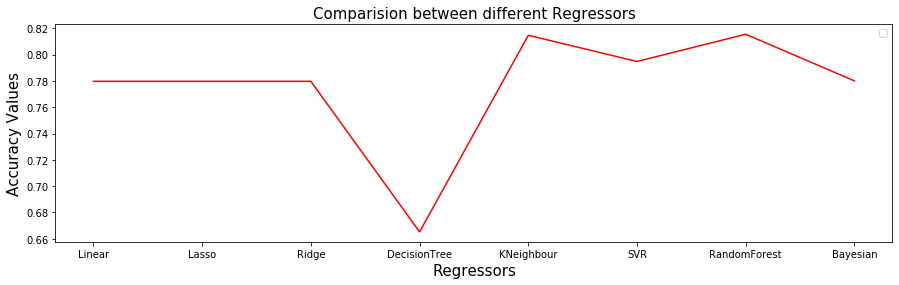

In [54]:
plt.figure(figsize=(15,4))
plt.plot(Regressors,R2_Score, color = 'Red')

plt.title('Comparision between different Regressors',fontsize=15)
plt.xlabel('Regressors',fontsize=15)
plt.ylabel('Accuracy Values',fontsize=15)
plt.legend()
plt.show()


## KNeighbour Regressor is sutaible for Precipitation with accuracy of 88.36% followed by RandomForest Regressorwith accuracy of 86%

In [55]:
maxtemp2020=pd.read_csv("C:/Users/Abhishek Wagh/Desktop/MTech_Project/Sugarcane/Phase1/csv/MaxTemperature/maxtemp2020.csv")

In [56]:
maxtemp2020=maxtemp2020.drop(['Year','Month'],axis=1)

In [57]:
maxtemp2020=maxtemp2020.iloc[:,:].values

In [58]:
maxtemp2020

array([[30.7 , 29.82],
       [34.78, 33.2 ],
       [37.22, 36.84],
       [40.48, 39.81],
       [39.79, 39.48],
       [32.45, 31.45],
       [30.27, 29.46],
       [30.14, 29.42],
       [30.2 , 31.32],
       [29.7 , 33.12],
       [28.97, 32.22],
       [28.42, 30.31]])

In [59]:
maxtemp2020_pred=[]

In [60]:
#Using Kneighbour regressor for prediction
maxtemp2020_pred=kn.predict(maxtemp2020)

In [61]:
maxtemp2020_pred

array([30.32583333, 34.0875    , 37.6375    , 39.14333333, 39.3275    ,
       31.12083333, 30.16083333, 30.36833333, 30.29916667, 30.95083333,
       30.08916667, 29.5675    ])

In [62]:
#Predicting for 2020
maxtemp_data=pd.DataFrame(data=maxtemp2020_pred)
maxtemp_data

,0
0,30.325833
1,34.087500
2,37.637500
3,39.143333
4,39.327500
5,31.120833
6,30.160833
7,30.368333
8,30.299167
9,30.950833


In [63]:
#Exporting the predictions of 2020 into csv file
maxtemp_data.to_csv(r"C:\Users\Abhishek Wagh\Desktop\MTech_Project\Sugarcane\Phase1\csv\MaxTemperature\2020maxtemp.csv")
